In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [13]:

#dataset
df = pd.read_csv('data.csv')
df.drop(['sl_no','salary'], axis = 1, inplace= True)

df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


In [14]:
# Summary statistics
df.describe()


,gender,ssc_p,hsc_p,degree_p,etest_p,mba_p
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,0.353488,67.303395,66.333163,66.370186,72.100558,62.278186
std,0.479168,10.827205,10.897509,7.358743,13.275956,5.833385
min,0.000000,40.890000,37.000000,50.000000,50.000000,51.210000
25%,0.000000,60.600000,60.900000,61.000000,60.000000,57.945000
50%,0.000000,67.000000,65.000000,66.000000,71.000000,62.000000
75%,1.000000,75.700000,73.000000,72.000000,83.500000,66.255000
max,1.000000,89.400000,97.700000,91.000000,98.000000,77.890000


In [20]:
# Data types
df['gender'] = df['gender'].astype('object')

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
dtypes: float64(5), object(8)
memory usage: 22.0+ KB


### Univariate analysis - Visualizing Categorical Features:


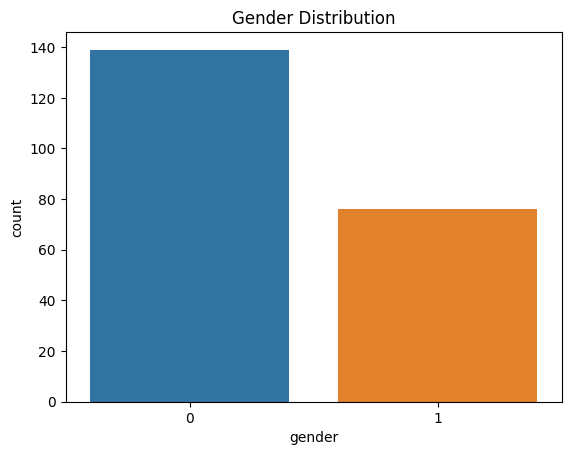

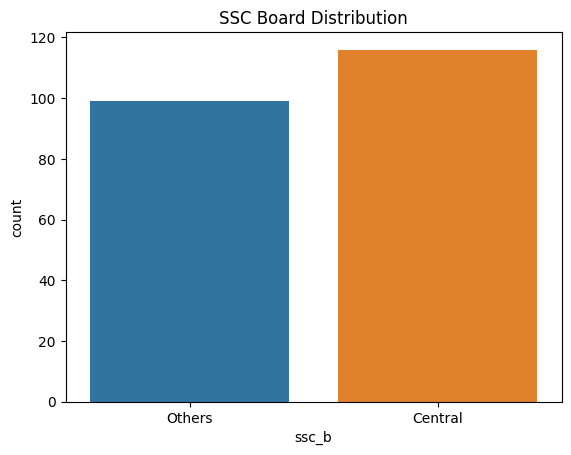

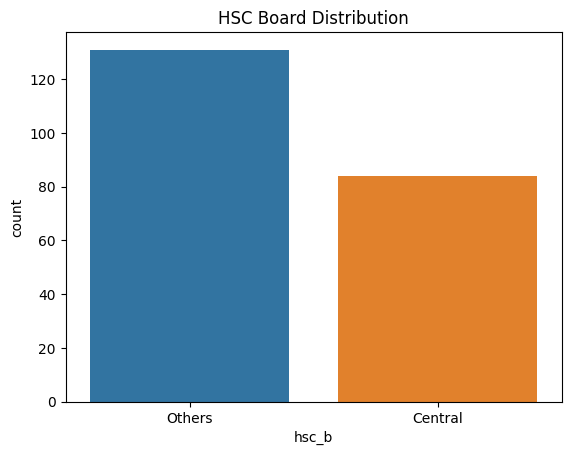

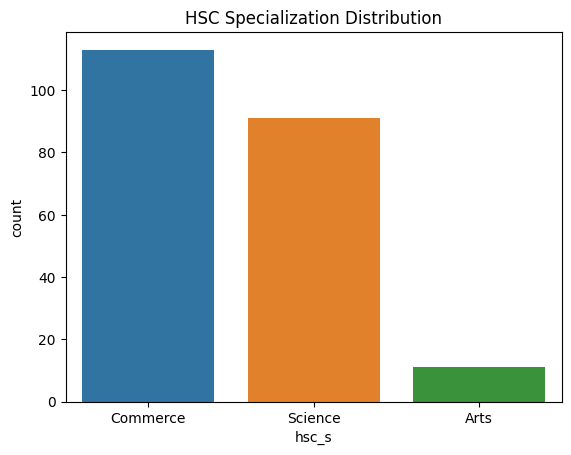

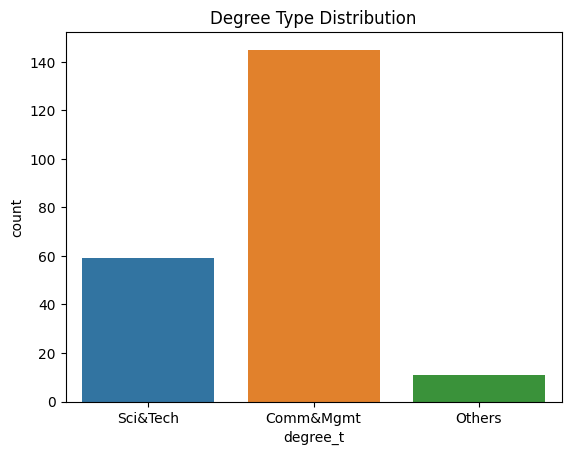

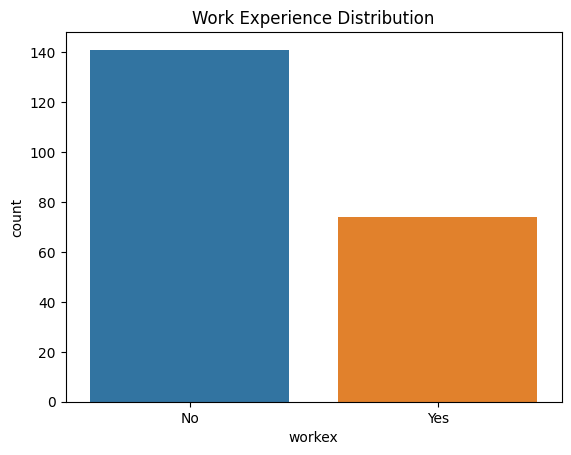

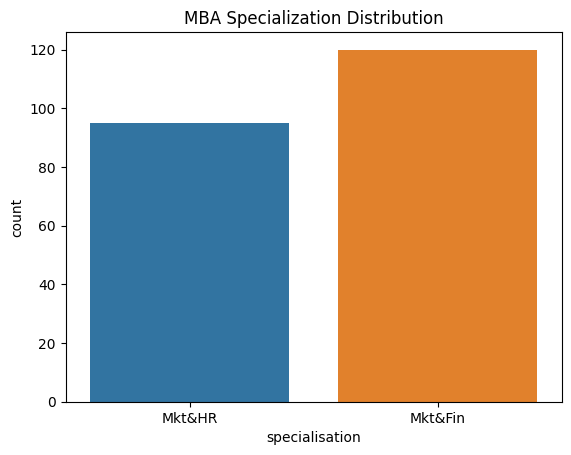

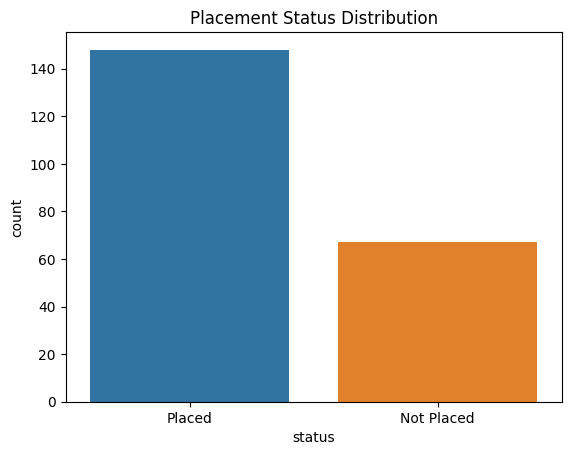

In [21]:
# Gender distribution
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.show()

# SSC Board distribution
sns.countplot(x='ssc_b', data=df)
plt.title('SSC Board Distribution')
plt.show()

# HSC Board distribution
sns.countplot(x='hsc_b', data=df)
plt.title('HSC Board Distribution')
plt.show()

# HSC Specialization distribution
sns.countplot(x='hsc_s', data=df)
plt.title('HSC Specialization Distribution')
plt.show()

# Degree Type distribution
sns.countplot(x='degree_t', data=df)
plt.title('Degree Type Distribution')
plt.show()

# Work Experience distribution
sns.countplot(x='workex', data=df)
plt.title('Work Experience Distribution')
plt.show()

# MBA Specialization distribution
sns.countplot(x='specialisation', data=df)
plt.title('MBA Specialization Distribution')
plt.show()

# Placement Status distribution
sns.countplot(x='status', data=df)
plt.title('Placement Status Distribution')
plt.show()


Important findings - 

More students are from Commerce and Science as compared to ones from Arts

There are 2 times as more freshers in the batch against students with professional experience.

###  Visualizing Numerical Features:


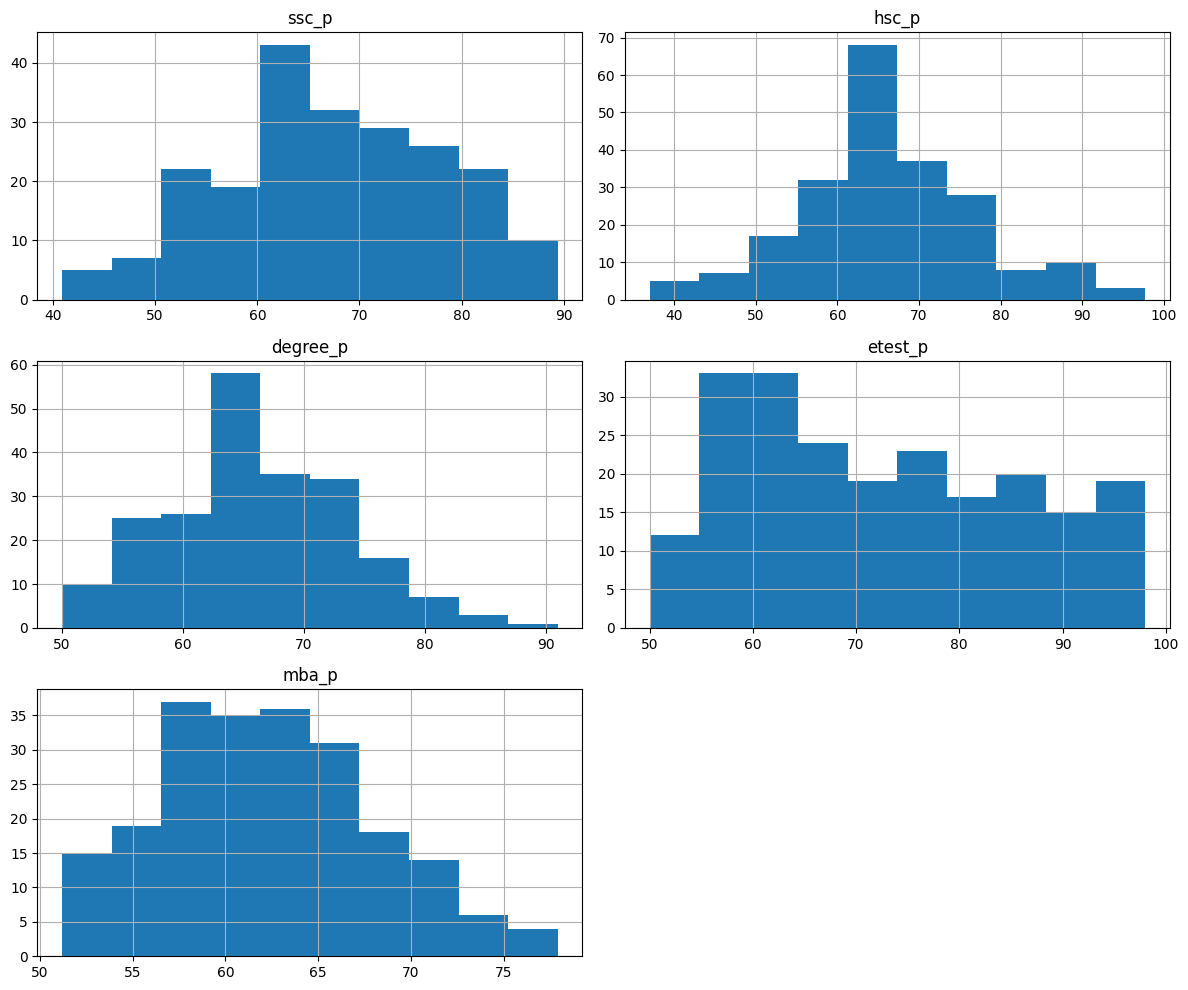

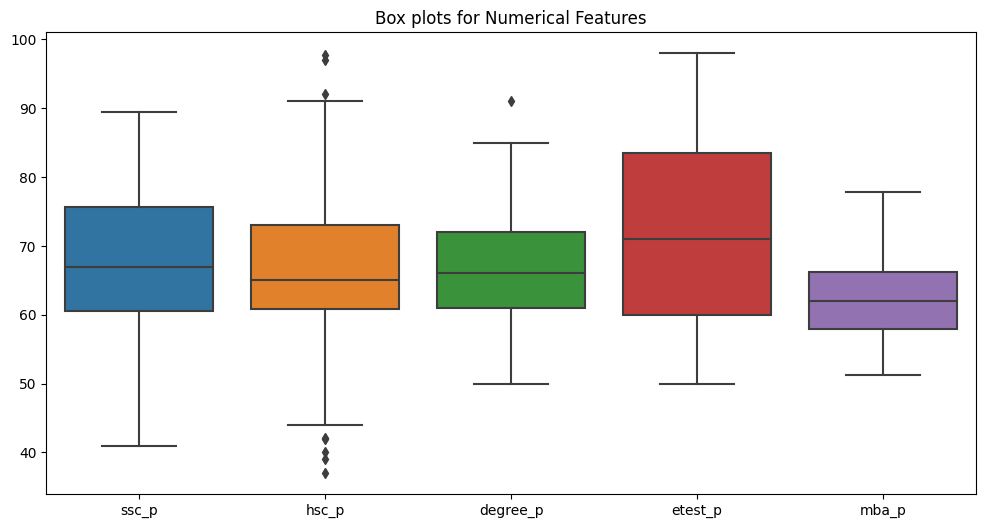

In [22]:
# Histograms for numerical features
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

# Box plots for numerical features
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']))
plt.title('Box plots for Numerical Features')
plt.show()


Important Findings - 

The numerical features are quite fairly distributed with a few having tails as shown in the histograms above.

There are very few outliers in the columns, and removing them would be decreasing the size of our dataset, hence I planned to keep them in the prediction phase. 

### Bivariate Analsyis - Analyzing Relationships Between Features

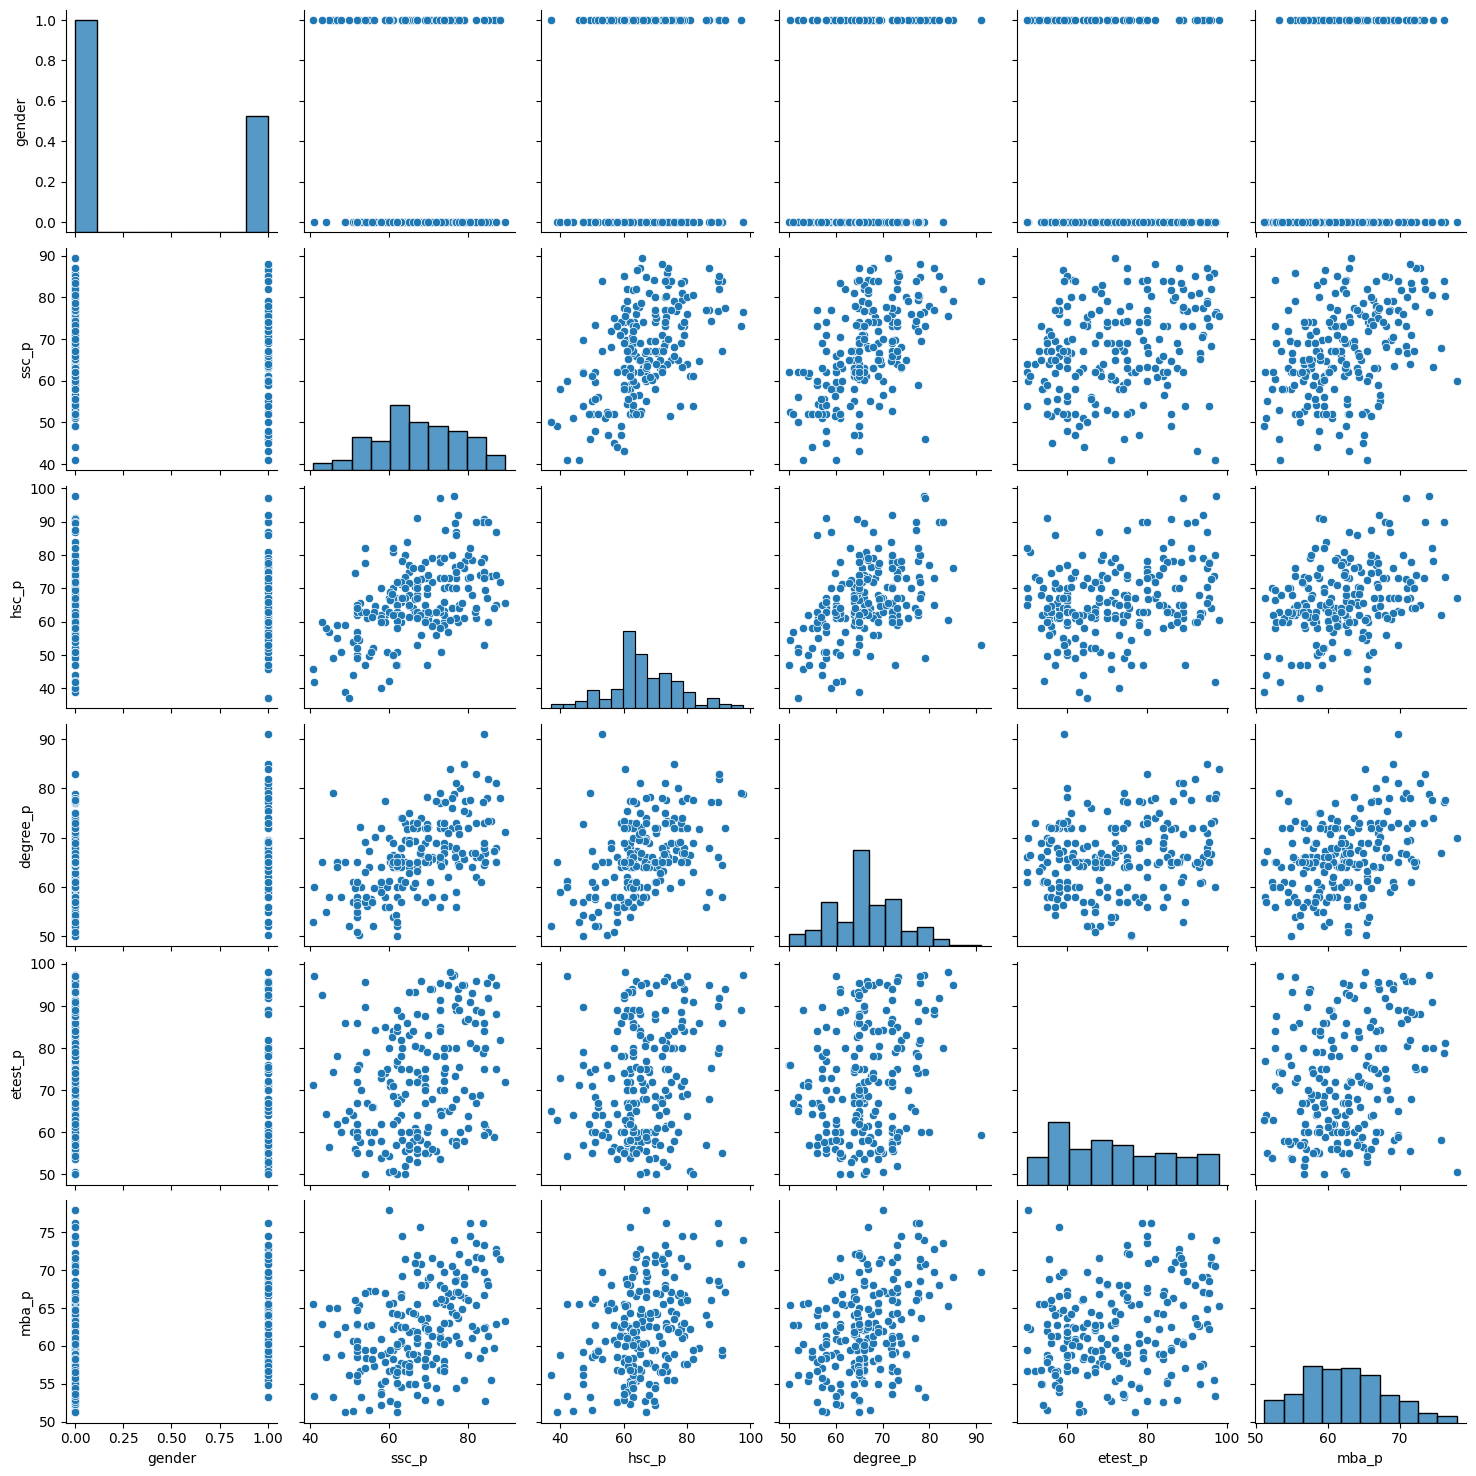

In [23]:
# Scatter plots
sns.pairplot(df)
plt.show()


### Exploring the Target Variable:


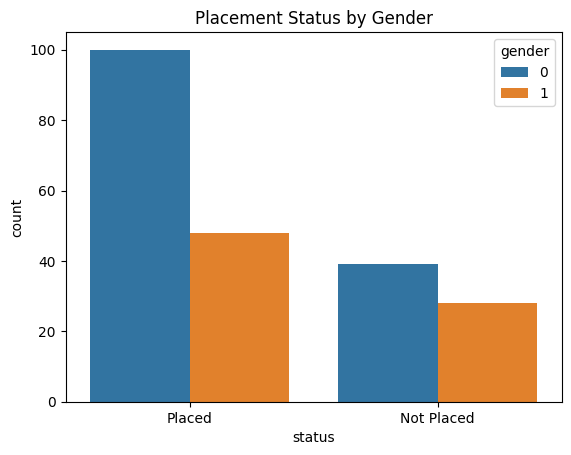

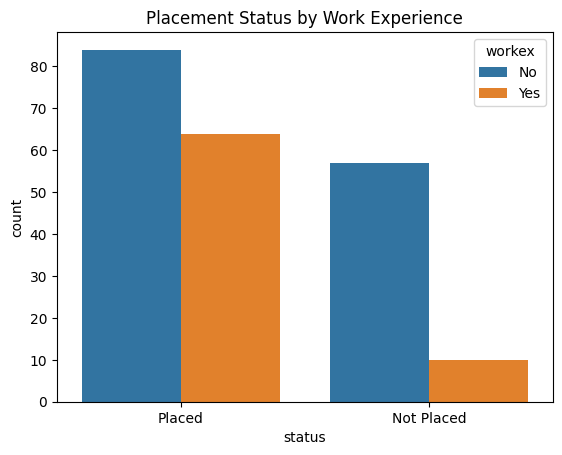

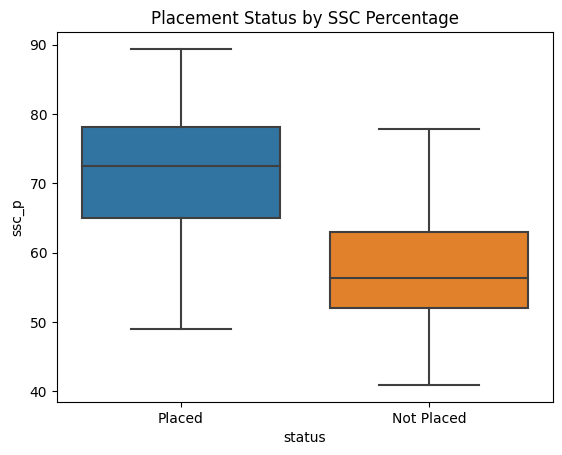

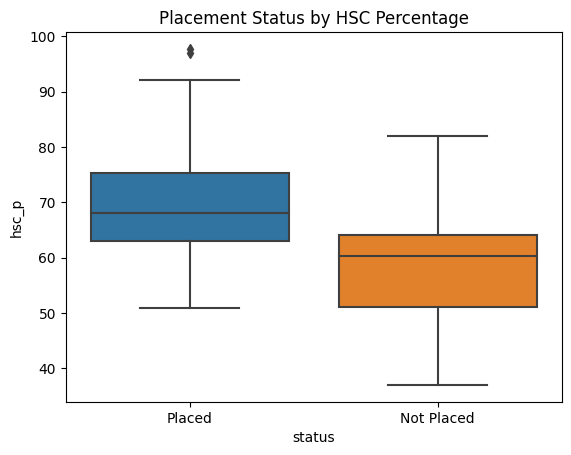

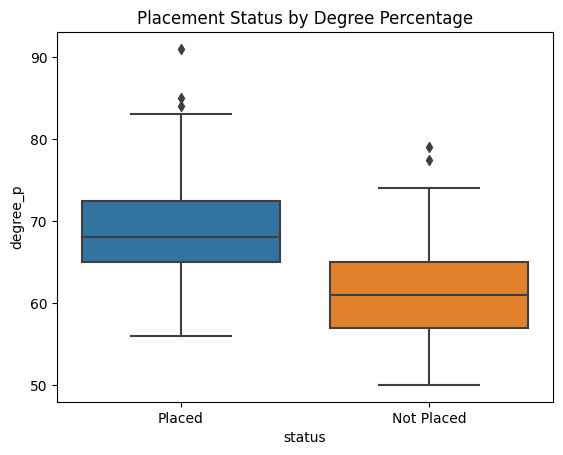

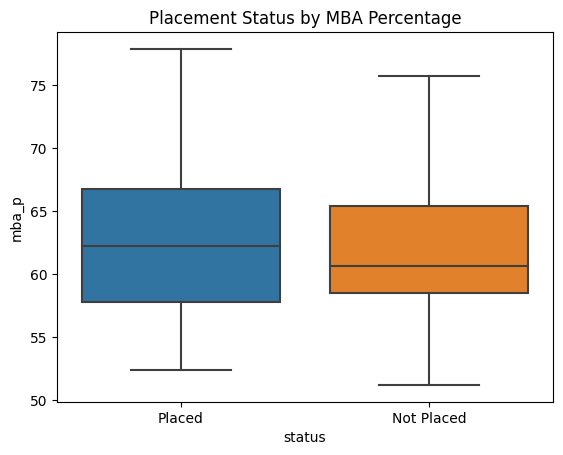

In [24]:
# Placement Status vs. Other Features
sns.countplot(x='status', hue='gender', data=df)
plt.title('Placement Status by Gender')
plt.show()

sns.countplot(x='status', hue='workex', data=df)
plt.title('Placement Status by Work Experience')
plt.show()

sns.boxplot(x='status', y='ssc_p', data=df)
plt.title('Placement Status by SSC Percentage')
plt.show()

sns.boxplot(x='status', y='hsc_p', data=df)
plt.title('Placement Status by HSC Percentage')
plt.show()

sns.boxplot(x='status', y='degree_p', data=df)
plt.title('Placement Status by Degree Percentage')
plt.show()

sns.boxplot(x='status', y='mba_p', data=df)
plt.title('Placement Status by MBA Percentage')
plt.show()


Key Findings - 

Obviously people with consistent good score cards from school to college got more offers.

There are students who didn't got placed even after having past work experience, leading us to say that work experience doesnot guarentee placement, there are multiple factors which play key roles.

### MultiVariate Analysis

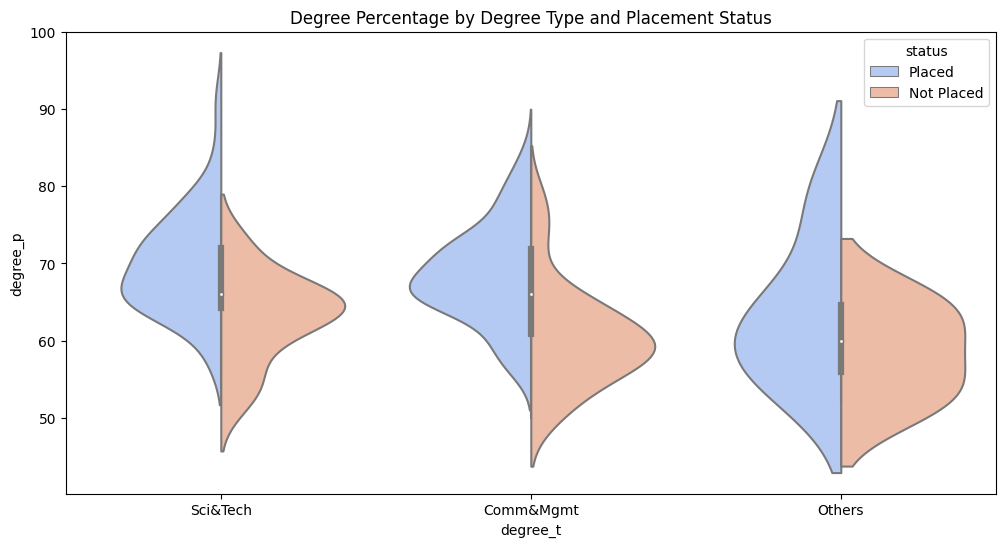

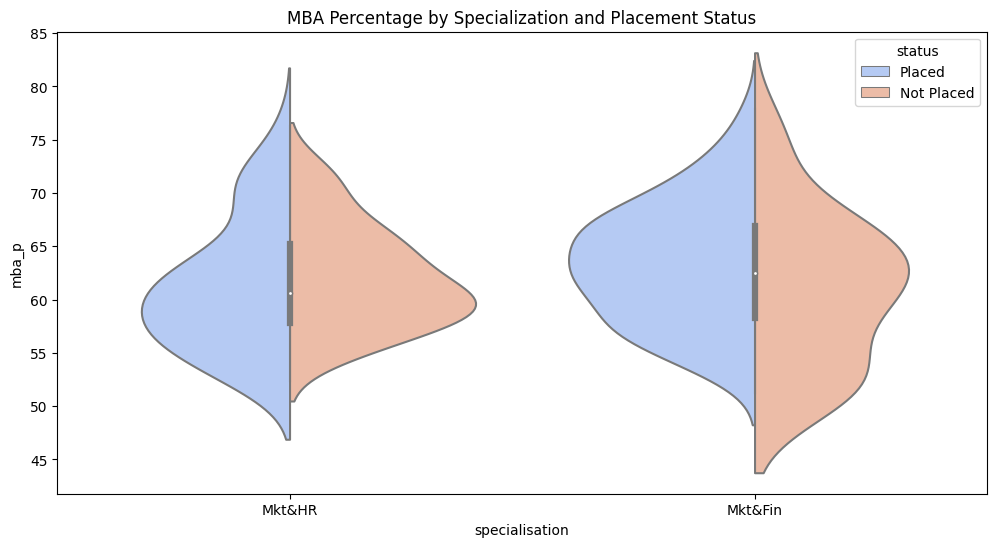

In [27]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='degree_t', y='degree_p', hue='status', data=df, split=True, palette='coolwarm')
plt.title('Degree Percentage by Degree Type and Placement Status')
plt.show()

plt.figure(figsize=(12, 6))
sns.violinplot(x='specialisation', y='mba_p', hue='status', data=df, split=True, palette='coolwarm')
plt.title('MBA Percentage by Specialization and Placement Status')
plt.show()


How to read - 

Colors tell us about a student placed or not, area covered by each color tells about number of students have that percentage.

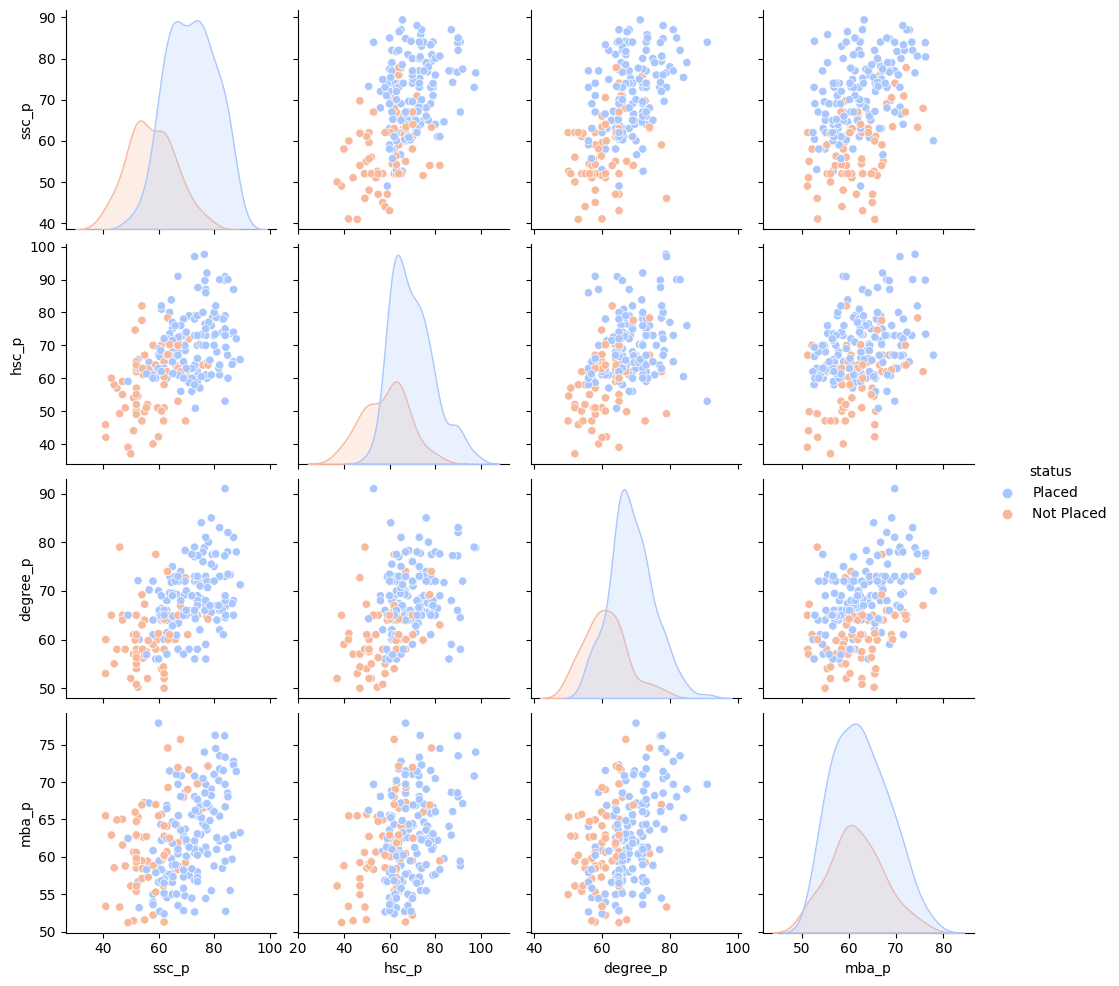

In [29]:
selected_features = df[['ssc_p', 'hsc_p', 'degree_p', 'mba_p', 'status']]
sns.pairplot(selected_features, hue='status', palette='coolwarm')
plt.show()
